<a href="https://colab.research.google.com/github/hemanthReddy365/fake_review_prediction/blob/main/hotel_booking_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
meal                                  0
country                             455
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              4639
company                           20108


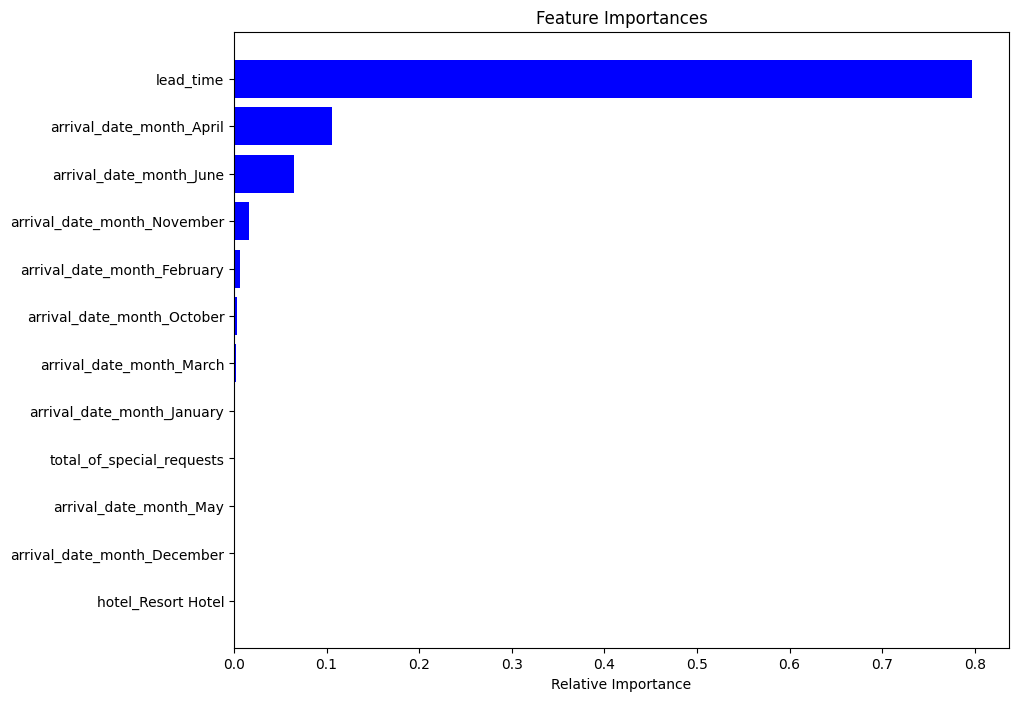

Model Accuracy: 0.8333333333333334


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

file_path = 'hotel_bookings.csv'
df = pd.read_csv("/content/hotel_bookings.csv")

print(df.isnull().sum())
df.dropna(inplace=True)

data = df[['hotel', 'lead_time', 'arrival_date_month', 'total_of_special_requests']]
target = df['is_canceled']

data = pd.get_dummies(data)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

predictions = rf.predict(X_test)

accuracy = accuracy_score(y_test, predictions)

feature_importances = rf.feature_importances_

features = data.columns
importances = feature_importances
indices = np.argsort(importances)

plt.figure(figsize=(10, 8), facecolor='white')
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

print('Model Accuracy:', accuracy)
